# Linear Regression

In [1]:
#Importing the necessary libraries

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns 

#%matplotlib inline

### Importing the Data 

The goal of today's analysis will be to use sklearn for applying **linear regression**.


In [2]:
df = pd.read_csv("Real estate.csv")

In [3]:
df.head(10)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
5,6,2012.667,7.1,2175.03000,3,24.96305,121.51254,32.1
6,7,2012.667,34.5,623.47310,7,24.97933,121.53642,40.3
7,8,2013.417,20.3,287.60250,6,24.98042,121.54228,46.7
8,9,2013.500,31.7,5512.03800,1,24.95095,121.48458,18.8
9,10,2013.417,17.9,1783.18000,3,24.96731,121.51486,22.1


In [4]:
df.shape

(414, 8)

In [5]:
# We are going to set "No." as the index of the dataset

#df.set_index("No", inplace = True)
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


#### Train and Test splits

Dividing the data into 80% train and 20% test splits.\
I am setting a random state or seed so that the data does not get shuffled differently everytime we run the cell. 

In [6]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [7]:
# Setting up the X and Y matrices.

X = df[['X1 transaction date', 'X2 house age','X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]

Y = df[['Y house price of unit area']]

In [10]:
Y.head()

,Y house price of unit area
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1


In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 100)

In [19]:
#X= X-train + X-test
414-331

83

In [17]:
X_train.shape

(331, 6)

In [21]:
Y_train.shape

(331, 1)

In [20]:
X_test.shape

(83, 6)

In [22]:
Y_test.shape

(83, 1)

## Exploratory Data Analysis

In statistics, exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often with visual methods.\
A quick look at the data will show you that you have 6 features. These features are represented as $X1, X2 , ... , X6$.

* $X1$ = The date of transaction.
* $X2$ = Age of the house.
* $X3$ = Distance to the nearest MRT station.
* $X4$ = Total number of convenience stores.
* $X5$ = Latitude.
* $X6$ = Longitude.

These are independent variables. They are also called features or attributes.\

* $Y$: Price of the house.\

Y is the output and is thus the dependent variable. The value of Y is what we have to predict with a model that best fits the relationship between Y and all the other features, $X$.

*We will try to plot every feature as such that their relation with the price of the house is clear. If the relation is not linear, we cannot fit linear regression into that feature.*

* **Remeber! We will only be using the train dataset for our EDA. No cheating! ;)**

In [23]:
#Checking for any null values in the dataset

(X_train.isnull()).sum()

X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
dtype: int64

In [24]:
X_train.describe()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
count,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000
mean,2013.146278,18.054079,1130.287229,3.987915,24.968761,121.532579
std,0.283019,11.459523,1302.867768,3.012073,0.012823,0.015539
min,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530
25%,2012.917000,9.100000,289.324800,1.000000,24.962990,121.525180
50%,2013.083000,16.200000,512.548700,4.000000,24.971100,121.537880
75%,2013.417000,29.500000,1528.770000,6.000000,24.977440,121.543100
max,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270


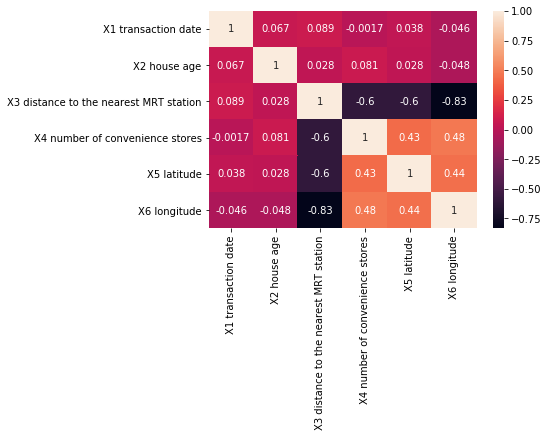

In [25]:
sns.heatmap(X_train.corr(), annot = True);

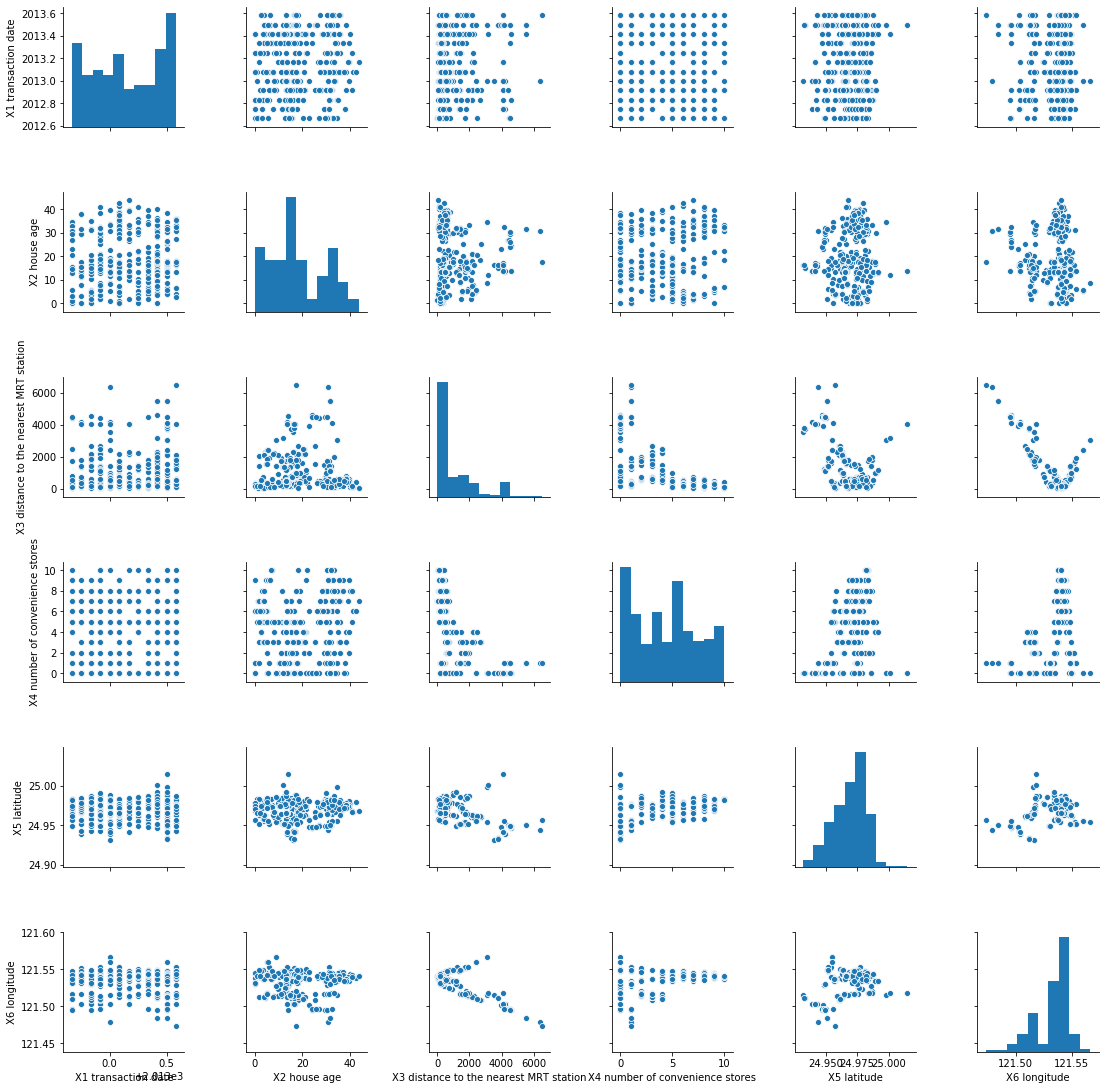

In [26]:
sns.pairplot(X_train);

#### Comparing the price of the house per unit according to it's latitude and longitude

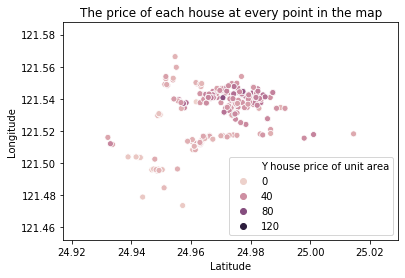

In [27]:
# There is definitely a correlation between the two but the relation is not linear. 

sns.scatterplot(x = "X5 latitude", y = "X6 longitude", data = X_train, hue = Y_train["Y house price of unit area"])
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("The price of each house at every point in the map");

In [28]:
'''
As there is no linear relationship between the latitude, longitude and the price of the house (as we have seen in the 
previous graph), we will omit these 2 for the linear regression model. We might use a different approach to fit this 
into the model in the near future, but as I am just starting to implement machine learning, I will keep this updated as time goes, 
for a model that fits the data better.
'''
# For now, I am dropping the latitude and longitude features for the linear model.

#cannot use inplace = True as X_train is already a copy of df
X_train = X_train.drop(["X5 latitude","X6 longitude"], axis = 1) 
X_test = X_test.drop(["X5 latitude","X6 longitude"], axis = 1)

In [30]:
X_test.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores
121,2013.500,13.6,492.23130,5
353,2013.500,4.1,2147.37600,3
96,2013.417,6.4,90.45606,9
43,2012.750,34.4,512.78710,6
125,2013.167,1.1,193.58450,6


## Implementing Linear Regression

In [31]:
#importing linear models from sklearn
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

#creating an object of Linear Regression

model = linear_model.LinearRegression()

In [33]:
model.fit(X_train, Y_train);

In [34]:
model.coef_

array([[ 6.57585873e+00, -2.68063354e-01, -5.55896950e-03,
         1.15053472e+00]])

In [35]:
model.intercept_

array([-13194.05113778])

In [37]:
prediction = model.predict(X_test)

In [38]:
accuracy = model.score(X_test, Y_test)*100
print(f"The accurancy of the model is {round(accuracy, 2)}%")

The accurancy of the model is 63.98%


## Modeling our prediction

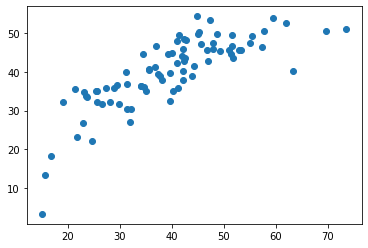

In [39]:
plt.scatter(x = Y_test, y = prediction);

Thank you for reading my notebook. This is the first ever notebook that I wrote from start to end and submitted on kaggle.
If you find any silly mistakes or if you have any suggestions, feel free to comment down below. 

# TEST ACCURACY = 63.98%

### THANK YOU FOR YOUR TIME! :) <3

Do not forget to upvote if you like the notebook. Thank you! 

In [48]:
model.predict([[2013.8]],[[10]],[[20]],[[2]])

TypeError: predict() takes 2 positional arguments but 5 were given

In [45]:
X_test.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores
121,2013.500,13.6,492.23130,5
353,2013.500,4.1,2147.37600,3
96,2013.417,6.4,90.45606,9
43,2012.750,34.4,512.78710,6
125,2013.167,1.1,193.58450,6
